# Project Objectives:

1. Import necessary libraries.
2. Clean and process the data (Handle null values, Normalization of the data).
3. Perform Exploratory Data Analysis and give the inference.
4. Try out different models from Scikit-Learn on the training set.
5. Test the model on the test set and get the MSE.
6. Compare the models and give out inference.

## Step 1: Import necessary libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from PIL import Image, ImageOps
import seaborn as sns

## Step 2: Clean and process the data

In [3]:
df = pd.read_csv("housing.csv")
df2 = df
df3 = df
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
df2.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### We will fill the null values in `total_bedrooms` column with the median of that column.

In [5]:
df2 = df2.fillna(df2['total_bedrooms'].median())
df3 = df3.fillna(df3['total_bedrooms'].median())
df2.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### We will encode the `ocean_proximity` column with the label encoder.

In [6]:
X = df2.drop(["median_house_value"], axis=1)
y = df2["median_house_value"]

le = LabelEncoder()
X['ocean_proximity']=le.fit_transform(X['ocean_proximity'])

X.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  ocean_proximity  
0       322.0       126.0         8.3252                3  
1      2401.0      1138.0         8.3014                3  
2       496.0       177.0         7.2574                3  
3       558.0       219.0         5.6431                3  
4       565.0       259.0         3.8462                3

### We will divide every value in every column by the maximum value of that column.

In [7]:
k = list(X.columns)
l = len(list(X.columns))

for i in range(l):
    X[k[i]] /= max(np.abs(X[k[i]]))

y /= max(y)
X.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -0.982951  0.902980            0.788462     0.022380        0.020016   
1  -0.982871  0.902503            0.403846     0.180544        0.171606   
2  -0.983032  0.902265            1.000000     0.037309        0.029480   
3  -0.983112  0.902265            1.000000     0.032401        0.036462   
4  -0.983112  0.902265            1.000000     0.041378        0.043445   

   population  households  median_income  ocean_proximity  
0    0.009024    0.020717       0.555010             0.75  
1    0.067289    0.187110       0.553423             0.75  
2    0.013901    0.029102       0.483823             0.75  
3    0.015638    0.036008       0.376204             0.75  
4    0.015834    0.042585       0.256412             0.75

In [8]:
y.head()

0    0.905198
1    0.716999
2    0.704199
3    0.682599
4    0.684399
Name: median_house_value, dtype: float64

## Step 3: Perform Exploratory Data Analysis

In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
df3.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

### Getting the minimum latitudes and longitudes

In [11]:
BBox = (df2.longitude.min(),df2.longitude.max(),df2.latitude.min(),df2.latitude.max())
BBox

(-124.35, -114.31, 32.54, 41.95)

### Checking the map

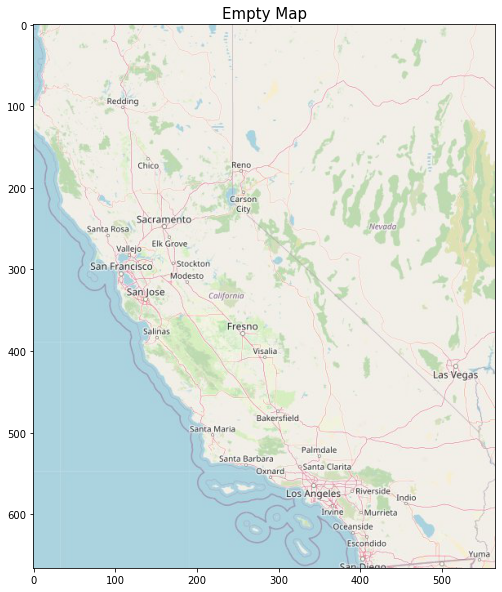

In [12]:
fig, ax = plt.subplots(figsize=(15,10))

empt_map = Image.open('map.jpg')

ax.set_title("Empty Map",fontsize=15)
plt.imshow(empt_map)

plt.show()

### Spatial Data Plot

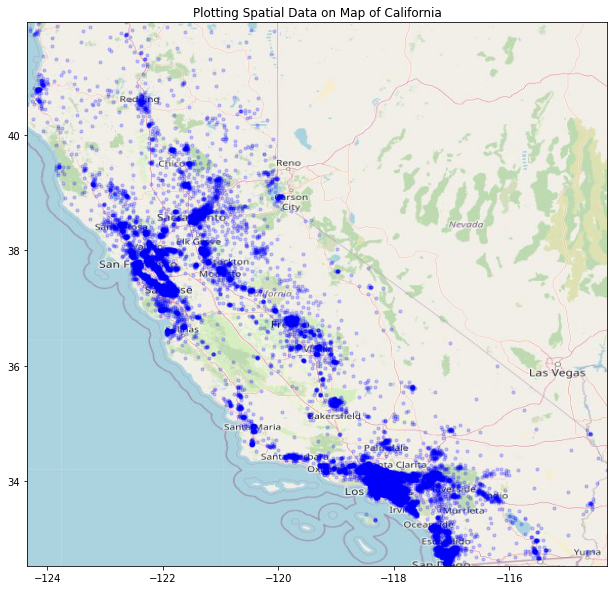

In [13]:
cal_map = plt.imread('map.jpg')

fig, ax = plt.subplots(figsize=(15,10))

ax.scatter(df2.longitude, df2.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Map of California')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

ax.imshow(cal_map, zorder=0, extent = BBox, aspect= 'equal');

#### Inference:
* The bay areas of San Francisco and Los Angeles have more houses.

### Plot on the basis of cost

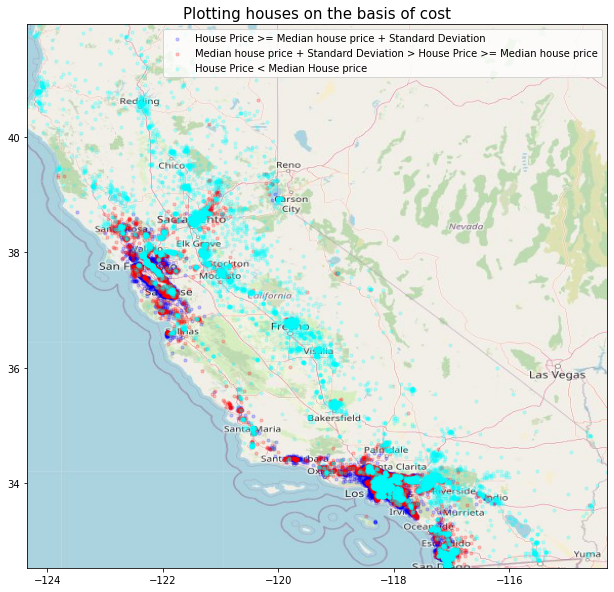

In [14]:
a = df3['median_house_value']
bet = pd.DataFrame({'Latitude':df3['latitude'],'Longitude':df3['longitude'],'House Cost':a})

bet1 = bet[bet['House Cost'] >= (bet['House Cost'].median()+bet['House Cost'].std())]
bet_ = bet[bet['House Cost'] >= bet['House Cost'].median()]
bet2 = bet_[bet_['House Cost'] < (bet['House Cost'].median()+bet['House Cost'].std())]
bet3 = bet[bet['House Cost'] < bet['House Cost'].median()]

fig, ax = plt.subplots(figsize=(15,10))

l1 = ax.scatter(bet1.Longitude, bet1.Latitude, zorder=1, alpha= 0.2, c='b', s=10)
l2 = ax.scatter(bet2.Longitude, bet2.Latitude, zorder=1, alpha= 0.2, c='r', s=10)
l3 = ax.scatter(bet3.Longitude, bet3.Latitude, zorder=1, alpha= 0.2, c='cyan', s=10)
ax.legend([l1,l2,l3],
          ['House Price >= Median house price + Standard Deviation',
           'Median house price + Standard Deviation > House Price >= Median house price',
           'House Price < Median House price'])

ax.set_title('Plotting houses on the basis of cost',fontsize=15)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

ax.imshow(cal_map, zorder=0, extent = BBox, aspect= 'equal');

#### Inference:
* The bay areas of San Francisco and Los Angeles are costlier. Majority of the houses are cheaper than the median house price.
* The median house cost is 179700 dollars.
* The standard deviation of house cost is 115396 dollars.

### Plot on the basis of household income

In [15]:
df3['median_income'].std()

1.8998217179452732

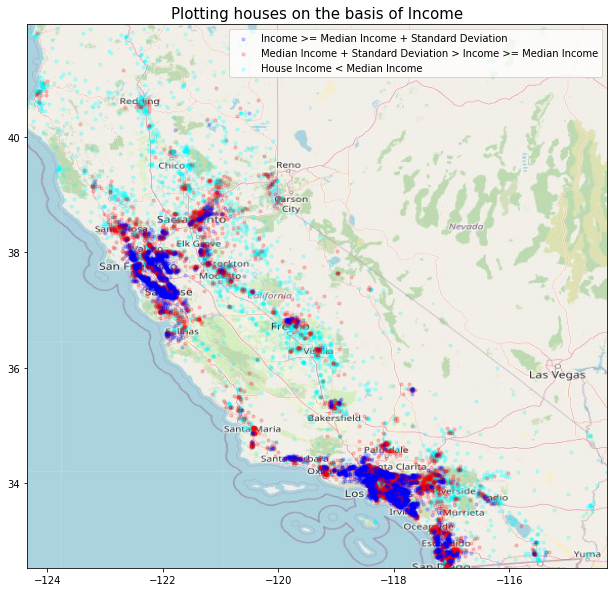

In [16]:
a = df3['median_income']
bet = pd.DataFrame({'Latitude':df3['latitude'],'Longitude':df3['longitude'],'Income':a})

bet1 = bet[bet['Income'] >= (bet['Income'].median()+bet['Income'].std())]
bet_ = bet[bet['Income'] >= bet['Income'].median()]
bet2 = bet_[bet_['Income'] < (bet['Income'].median()+bet['Income'].std())]
bet3 = bet[bet['Income'] < bet['Income'].median()]

fig, ax = plt.subplots(figsize=(15,10))

l3 = ax.scatter(bet3.Longitude, bet3.Latitude, zorder=1, alpha= 0.2, c='cyan', s=10)
l2 = ax.scatter(bet2.Longitude, bet2.Latitude, zorder=1, alpha= 0.2, c='r', s=10)
l1 = ax.scatter(bet1.Longitude, bet1.Latitude, zorder=1, alpha= 0.2, c='b', s=10)

ax.legend([l1,l2,l3],
          ['Income >= Median Income + Standard Deviation',
           'Median Income + Standard Deviation > Income >= Median Income',
           'House Income < Median Income'])

ax.set_title('Plotting houses on the basis of Income',fontsize=15)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

ax.imshow(cal_map, zorder=0, extent = BBox, aspect= 'equal');

#### Inference:
* Families living in the bay area are wealthier. However, majority of the people have income less than the median income
* Median income is 3.535 dollars.
* Standard deviation of income is 1.8998 dollars.

### Plot on the basis of House Age

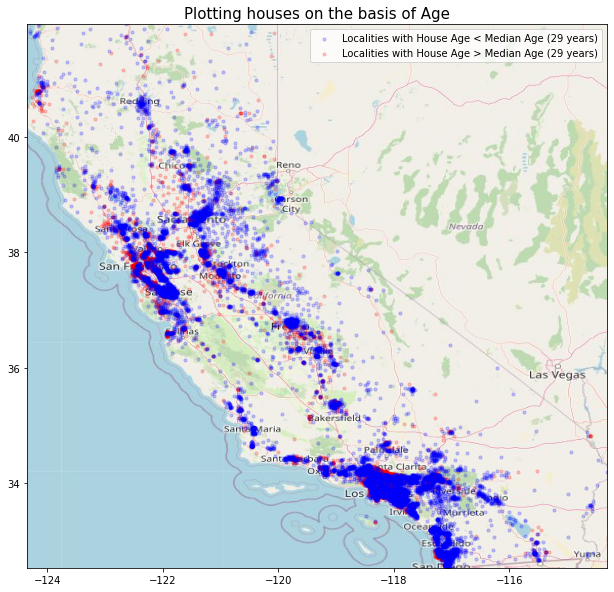

In [17]:
a = df3['housing_median_age']
b = list((a>df3['housing_median_age'].median()).astype(int))

bet = pd.DataFrame({'Latitude':df3['latitude'],'Longitude':df3['longitude'],'House Age':b})
bet1 = bet[bet['House Age']==0]
bet2 = bet[bet['House Age']==1]

fig, ax = plt.subplots(figsize=(15,10))

l2 = ax.scatter(bet2.Longitude, bet2.Latitude, zorder=1, alpha= 0.2, c='r', s=10)
l1 = ax.scatter(bet1.Longitude, bet1.Latitude, zorder=1, alpha= 0.2, c='b', s=10)

ax.legend([l1,l2],
          ['Localities with House Age < Median Age (29 years)','Localities with House Age > Median Age (29 years)'])

ax.set_title('Plotting houses on the basis of Age',fontsize=15)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

ax.imshow(cal_map, zorder=0, extent = BBox, aspect= 'equal');

#### Inference: 
* No relation can be found between the locality and the age of the house. However, the houses appear to be comparatively newer (Age is less than 29).
* The median house age is 29 years.

### Plot on the basis of Population

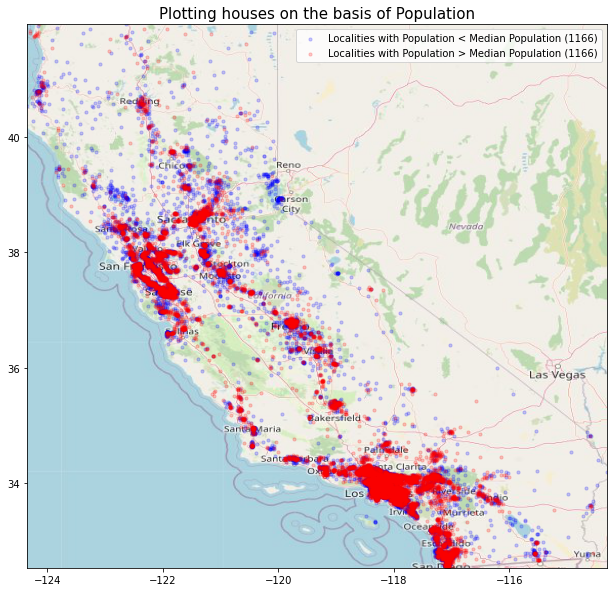

In [18]:
a = df3['population']
b = list((a>df3['population'].median()).astype(int))

bet = pd.DataFrame({'Latitude':df3['latitude'],'Longitude':df3['longitude'],'Population':b})
bet1 = bet[bet['Population']==0]
bet2 = bet[bet['Population']==1]

fig, ax = plt.subplots(figsize=(15,10))

l1 = ax.scatter(bet1.Longitude, bet1.Latitude, zorder=1, alpha= 0.2, c='b', s=10)
l2 = ax.scatter(bet2.Longitude, bet2.Latitude, zorder=1, alpha= 0.2, c='r', s=10)

ax.legend([l1,l2],
          ['Localities with Population < Median Population (1166)','Localities with Population > Median Population (1166)'])

ax.set_title('Plotting houses on the basis of Population',fontsize=15)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

ax.imshow(cal_map, zorder=0, extent = BBox, aspect= 'equal');

#### Inference:
* The median population of California is 1166 people per locality.

In [19]:
df3.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

### Adding some new features

In [20]:
df3['Total_Income_of_Household'] = df3['population'] * df3['median_income']
df3['People_living_in_one_house'] = df3['population'] / df3['households']
df3['Income_of_one_house'] = df3['People_living_in_one_house'] * df3['median_income']
df3.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   Total_Income_of_Household  People_living_in_one_house  Income_of_one_house  
0                  2680.7144                    2.555556            21.275511  
1                 19931.6614                    2.109842            17.514641  
2                  3599.6704                    2.802260            20.337121  
3                  3148.8498                    2.547945            14.378310  
4                  2173.1030                    2.181467             8.390359

### Some More Plots

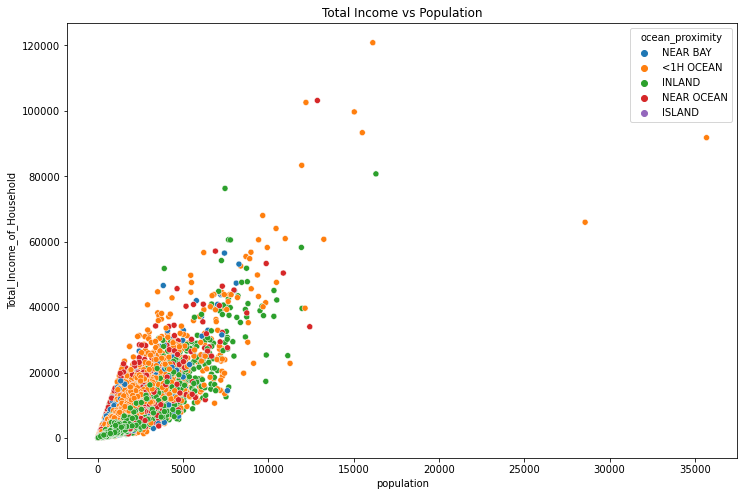

In [21]:
fig = plt.subplots(figsize=(12,8))
sns.scatterplot(y='Total_Income_of_Household',x='population',
                hue='ocean_proximity',
                data=df3).set(title='Total Income vs Population');

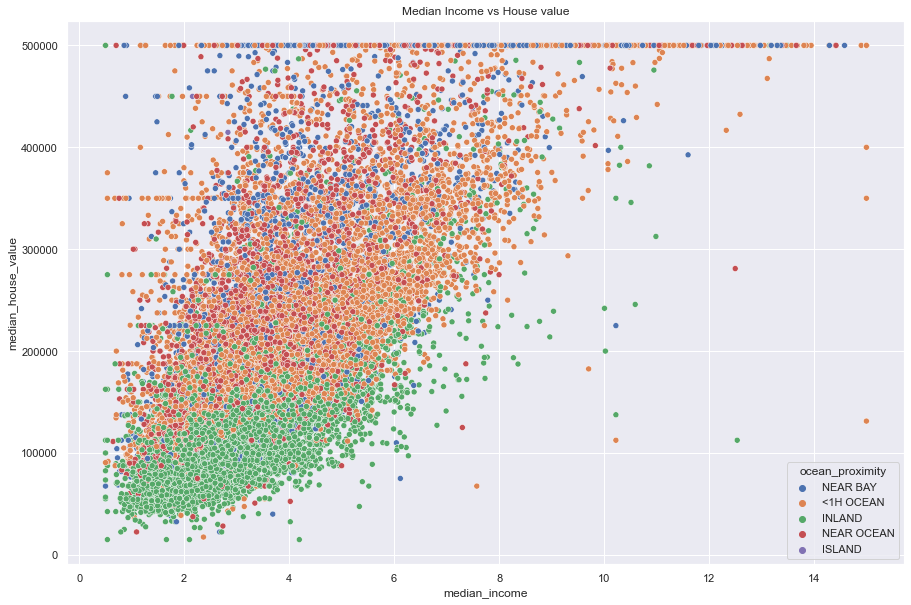

In [36]:
fig = plt.subplots(figsize=(15,10))
sns.scatterplot(x = 'median_income', y = 'median_house_value',
                hue = 'ocean_proximity', data = df3).set(title="Median Income vs House value");

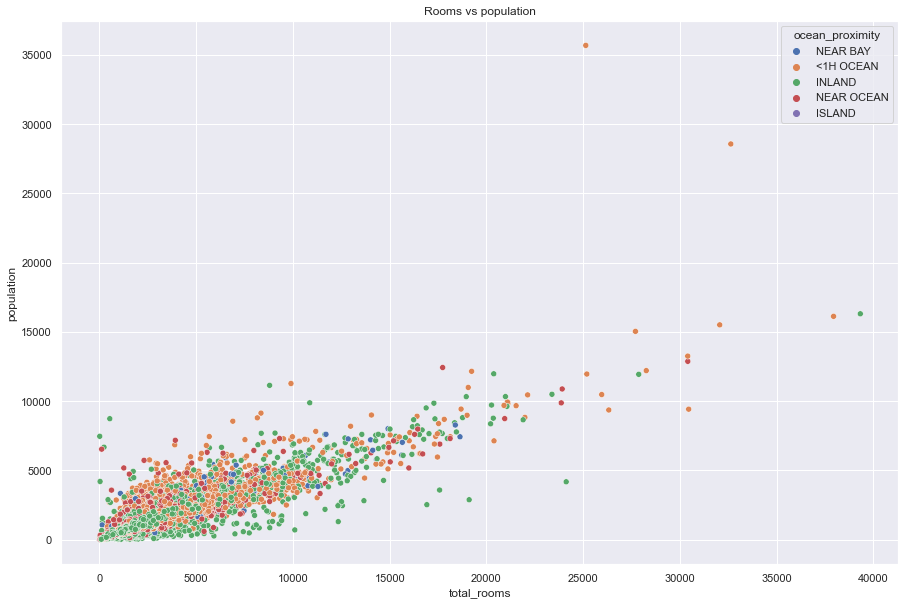

In [34]:
fig = plt.subplots(figsize=(15,10))
sns.scatterplot(x = 'total_rooms', y = 'population', hue = 'ocean_proximity', data = df3).set(title="Rooms vs population");

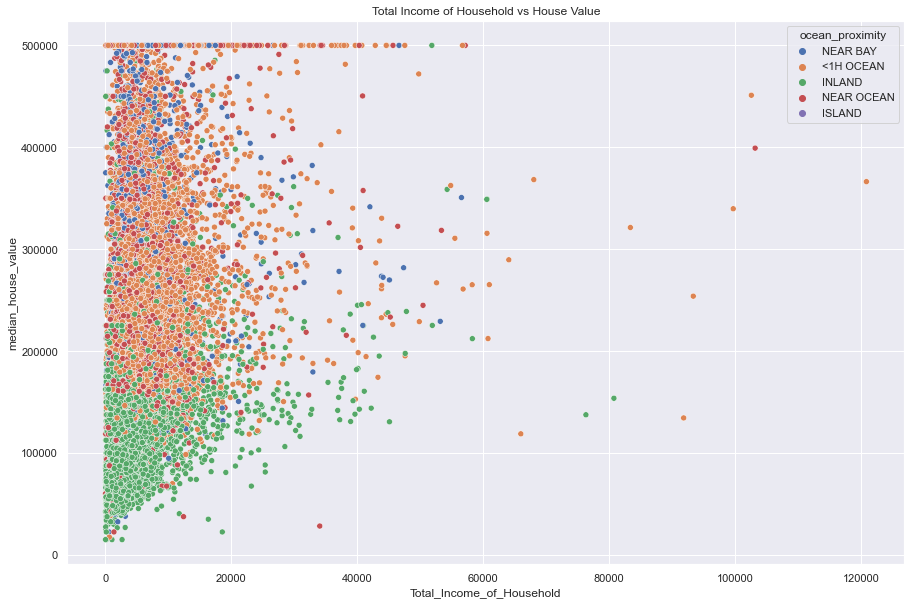

In [37]:
fig = plt.subplots(figsize=(15,10))
sns.scatterplot(x = 'Total_Income_of_Household', y = 'median_house_value',
                hue = 'ocean_proximity', data = df3).set(title="Total Income of Household vs House Value");

## Step 4: Try different models on the training set

### Splitting the data in train and test set

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Fitting the models

In [48]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)

reg = RandomForestRegressor()
reg.fit(X_train,y_train)

sgdr = SGDRegressor()
sgdr.fit(X_train,y_train)

SGDRegressor()

## Step 5: Test the models to get the MSE

In [49]:
ypred1 = linreg.predict(X_test)
ypred2 = reg.predict(X_test)
ypred3 = sgdr.predict(X_test)

print("MSE for Linear Regression: ",mean_squared_error(ypred1,y_test))
print("MSE for SGDRegressor: ",mean_squared_error(ypred3,y_test))
print("MSE for RandomForestRegressor: ",mean_squared_error(ypred2,y_test))

MSE for Linear Regression:  0.020247997461757667
MSE for SGDRegressor:  0.0263074789899942
MSE for RandomForestRegressor:  0.009888269326239296


## Inference: As we can see that the MSE for the model RandomForestRegressor is the least and hence is suited to solve the problem.